In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn  as sns
from scipy import stats
import math
import statistics
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [2]:
#####!!!!!!!!需判斷異常值背後的可能原因


#異常值: 偏離樣本整體數據的值,也被稱為離群值、新奇、噪聲、偏差和例外。
    #偽異常:由於業務特定運營動作產生的，其實是正常反映業務狀態，而不是資料本身的異常規律。
    #真異常:不是由於特定的業務動作引起的，而是客觀地反映了資料本身分佈異常的分佈個案。
#異常值通常在預處理過程中被認為是噪音而剔除,以避免其對總體資料評估和分析挖掘的影響

In [3]:
#為什麼會出現異常值？
    #數據輸入錯誤
    #測量誤差
    #故意離群:問題設計不合理或過於敏感出現的,例如在調查用戶年收入時，可能會有很多用戶故意報低或報高。
    #抽樣錯誤
    #自然異常值:例如在做用戶價值分析時，通常會發現前10%的用戶消費金額遠遠高於其他用戶

In [4]:
#何時不做拋棄處理：
    #異常值正常反映了真實的結果
    
    #異常檢測模型:異常檢測模型是針對整體樣本中的異常資料進行分析和挖掘
        #有三大類異常檢測方法。在假設資料集中大多數實例都是正常的前提下:
            #1.無監督異常檢測方法能通過尋找與其他資料最不匹配的實例來檢測出未標記測試資料的異常。
            #2.監督式異常檢測方法需要一個已經被標記「正常」與「異常」的資料集，並涉及到訓練分類器
                #(與許多其他的統計分類問題的關鍵區別是異常檢測的內在不均衡性）。
            #3.半監督式異常檢測方法根據一個給定的正常訓練資料集建立一個表示正常行為的模型，然後檢測由學習模型生成的測試實例的可能性。
            
    #包容異常值的資料建模:如果資料演算法和模型對異常值不敏感，那麼即使不處理異常值也不會對模型本身造成負面影響，ex：決策樹。

In [5]:
#異常值的判別方法
    #簡單統計分析: 觀察min,max, e.g.儀器量測出來的數值，超過儀器的規格。
    #3σ 原則:若資料服從正態分佈,距離超過平均值 3σ 的樣本屬於極小概率事件,基本不存在
    #盒鬚圖判別法:1.5*IQR之外的。 IQR = Q3-Q1
        

In [6]:
#異常值的處理方法
    #刪除異常值：若數量少直接刪除。
    #數據轉換：縮放特徵，以減少極端值。
    #聚類：以決策數處理。
    #替換：若為真異常，可以替換異常值。使用均值、中位數、眾數替換方法。
    #分離對待：如果異常值的數目比較多，分別處理與建模，最後對結果進行合併。

In [7]:
train = pd.read_csv("Titanic_train.csv")

mean: 29.69911764705882
std: 14.526497332334042


/Users/mac/opt/anaconda3/envs/regularenv/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


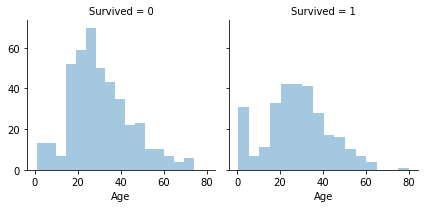

In [8]:
#簡單統計分析:

print(f'mean: {train["Age"].mean()}') #age平均
print(f'std: {train["Age"].std()}') #age標準差
# 連續型用分布圖行來看
g = sns.FacetGrid(train, col='Survived')#圖表基底,以survived為區隔
g.map(sns.distplot, 'Age', kde=False)#圖表資料

In [9]:
print(train['Age'].describe()) #age平均

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [10]:
#3σ 原則:

import numpy as np

# 創建一個函數，計算在這個資料中， ys:資料，times : 幾倍標準差，找出在這樣條件下的異常值。
def outliers_z_score(ys,times):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys]
    return np.where(np.abs(z_scores) > times)#return index

out_index=outliers_z_score(train['Age'],3)
print(out_index[0])
print("用第二種方法的找出的 outlier 有哪些?")
print(train.loc[out_index[0],'Age'])

[630 851]
用第二種方法的找出的 outlier 有哪些?
630    80.0
851    74.0
Name: Age, dtype: float64


In [11]:
#盒鬚圖判別法
def outliers_iqr(ys,times):
    #注意 使用 np.percentile 要去除 nan 要不然計算出來會錯誤，所以我們採用下者的程式 np.nanpercentile
    #quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * times)
    upper_bound = quartile_3 + (iqr * times)
    return np.where((ys > upper_bound) | (ys < lower_bound))

out_index2=outliers_iqr(train['Age'],1.5)
print(out_index2)
print("用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)")
print(train.loc[out_index2[0],'Age'])



(array([ 33,  54,  96, 116, 280, 456, 493, 630, 672, 745, 851]),)
用第三種方法的找出的 outlier 有哪些?(1.5 倍IQR)
33     66.0
54     65.0
96     71.0
116    70.5
280    65.0
456    65.0
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


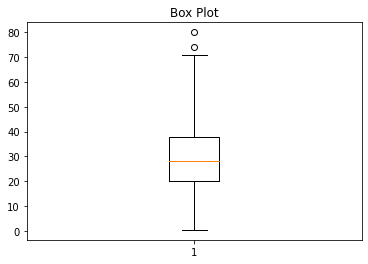

In [12]:
# 使用np.isnana(data)，找出在 age中的遺失值，然後逐位反轉，讓遺失值為 0,則可以透過索引的方式，濾掉遺失值。
plt.boxplot(train['Age'][~np.isnan(train['Age'])],whis=2)    #作圖
        # "~"轉為相反 類似 "!"                      #whis決定IQR的倍數 default 1.5
plt.title('Box Plot')
plt.show()

# HW

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


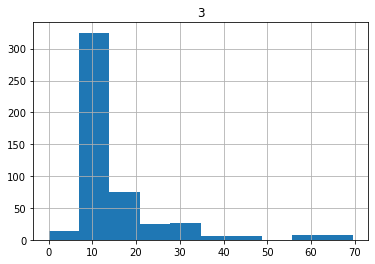

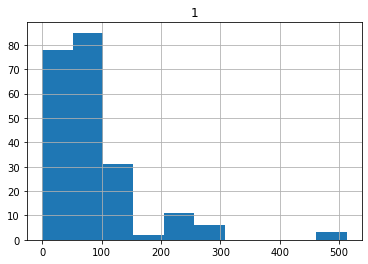

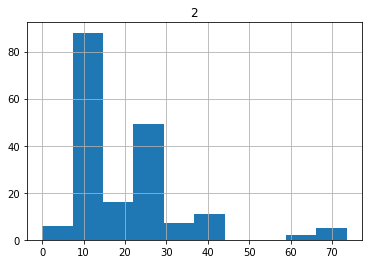

In [13]:
#Q1：觀察票價是否有異常值的現象？
print(train['Fare'].describe())
# 連續型用分布圖行來看
for i in train['Pclass'].unique():
    train[train['Pclass']==i]['Fare'].hist()
    plt.title(i)
    plt.show()

In [14]:
# 3σ
pc1 = train[train['Pclass']==1]['Fare'].reset_index(drop=True)
pc2 = train[train['Pclass']==2]['Fare'].reset_index(drop=True)
pc3 = train[train['Pclass']==3]['Fare'].reset_index(drop=True)
for i in [pc1,pc2,pc3]:
    out_index = outliers_z_score(i,3)
    print(out_index[0])
    print(i[list(out_index[0])].value_counts())

[ 49 163 179]
512.3292    3
Name: Fare, dtype: int64
[ 13  19  77 127 134 136 159]
73.5    5
65.0    2
Name: Fare, dtype: int64
[ 44  99 106 113 124 184 284 354 381 434 454 462 467 476]
69.5500    7
56.4958    7
Name: Fare, dtype: int64


In [15]:
# boxplot
for i in [pc1,pc2,pc3]:
    out_index = outliers_iqr(i,1.5)
    print(out_index[0])
    print(i[list(out_index[0])].value_counts())


[  5  17  23  49  63  69  80  88  89  97 124 134 163 165 169 176 178 179
 182 189]
227.5250    4
263.0000    4
211.3375    3
512.3292    3
247.5208    2
262.3750    2
221.7792    1
211.5000    1
Name: Fare, dtype: int64
[ 13  19  77 127 134 136 159]
73.5    5
65.0    2
Name: Fare, dtype: int64
[  8  10  15  32  35  37  42  44  53  76  92  99 103 105 106 107 113 114
 124 143 156 158 163 184 201 217 247 267 284 300 301 334 348 350 353 354
 373 376 377 381 400 431 434 445 449 452 454 462 467 469 476 488]
69.5500    7
56.4958    7
31.2750    7
46.9000    6
27.9000    6
39.6875    6
29.1250    5
31.3875    4
34.3750    4
Name: Fare, dtype: int64


In [16]:
#Q2：你覺得找出的異常需要做處理嗎？ (可以試著講出自己的想法)
#有重複的數值出現，可能是偽異常